<a href="https://colab.research.google.com/github/rndbblnn/stonks-jupyter/blob/main/backtrader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from datetime import datetime
import pandas as pd
import json
import requests
import urllib.parse
import warnings
import logging
import matplotlib.pyplot as plt
import matplotlib.image  as m_img
%matplotlib inline

!pip install backtrader
import backtrader as bt
warnings.filterwarnings('ignore')
from google.colab import files
from IPython.display import Image
chart_file = 'result.png'

plt.rcParams['figure.figsize'] = [30, 18]
plt.rcParams.update({'font.size': 18}) 

baseurl = 'https://d7f2c3211135.ngrok.io';
class Direction:
    LONG = 1
    SHORT = 2

def encodeUrl(arg):
  str = arg.replace('.','%2E')
  return urllib.parse.quote(str)

class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)
cerebro.broker.setcash(1000000.0)
cerebro.addsizer(bt.sizers.PercentSizer, percents = 100)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


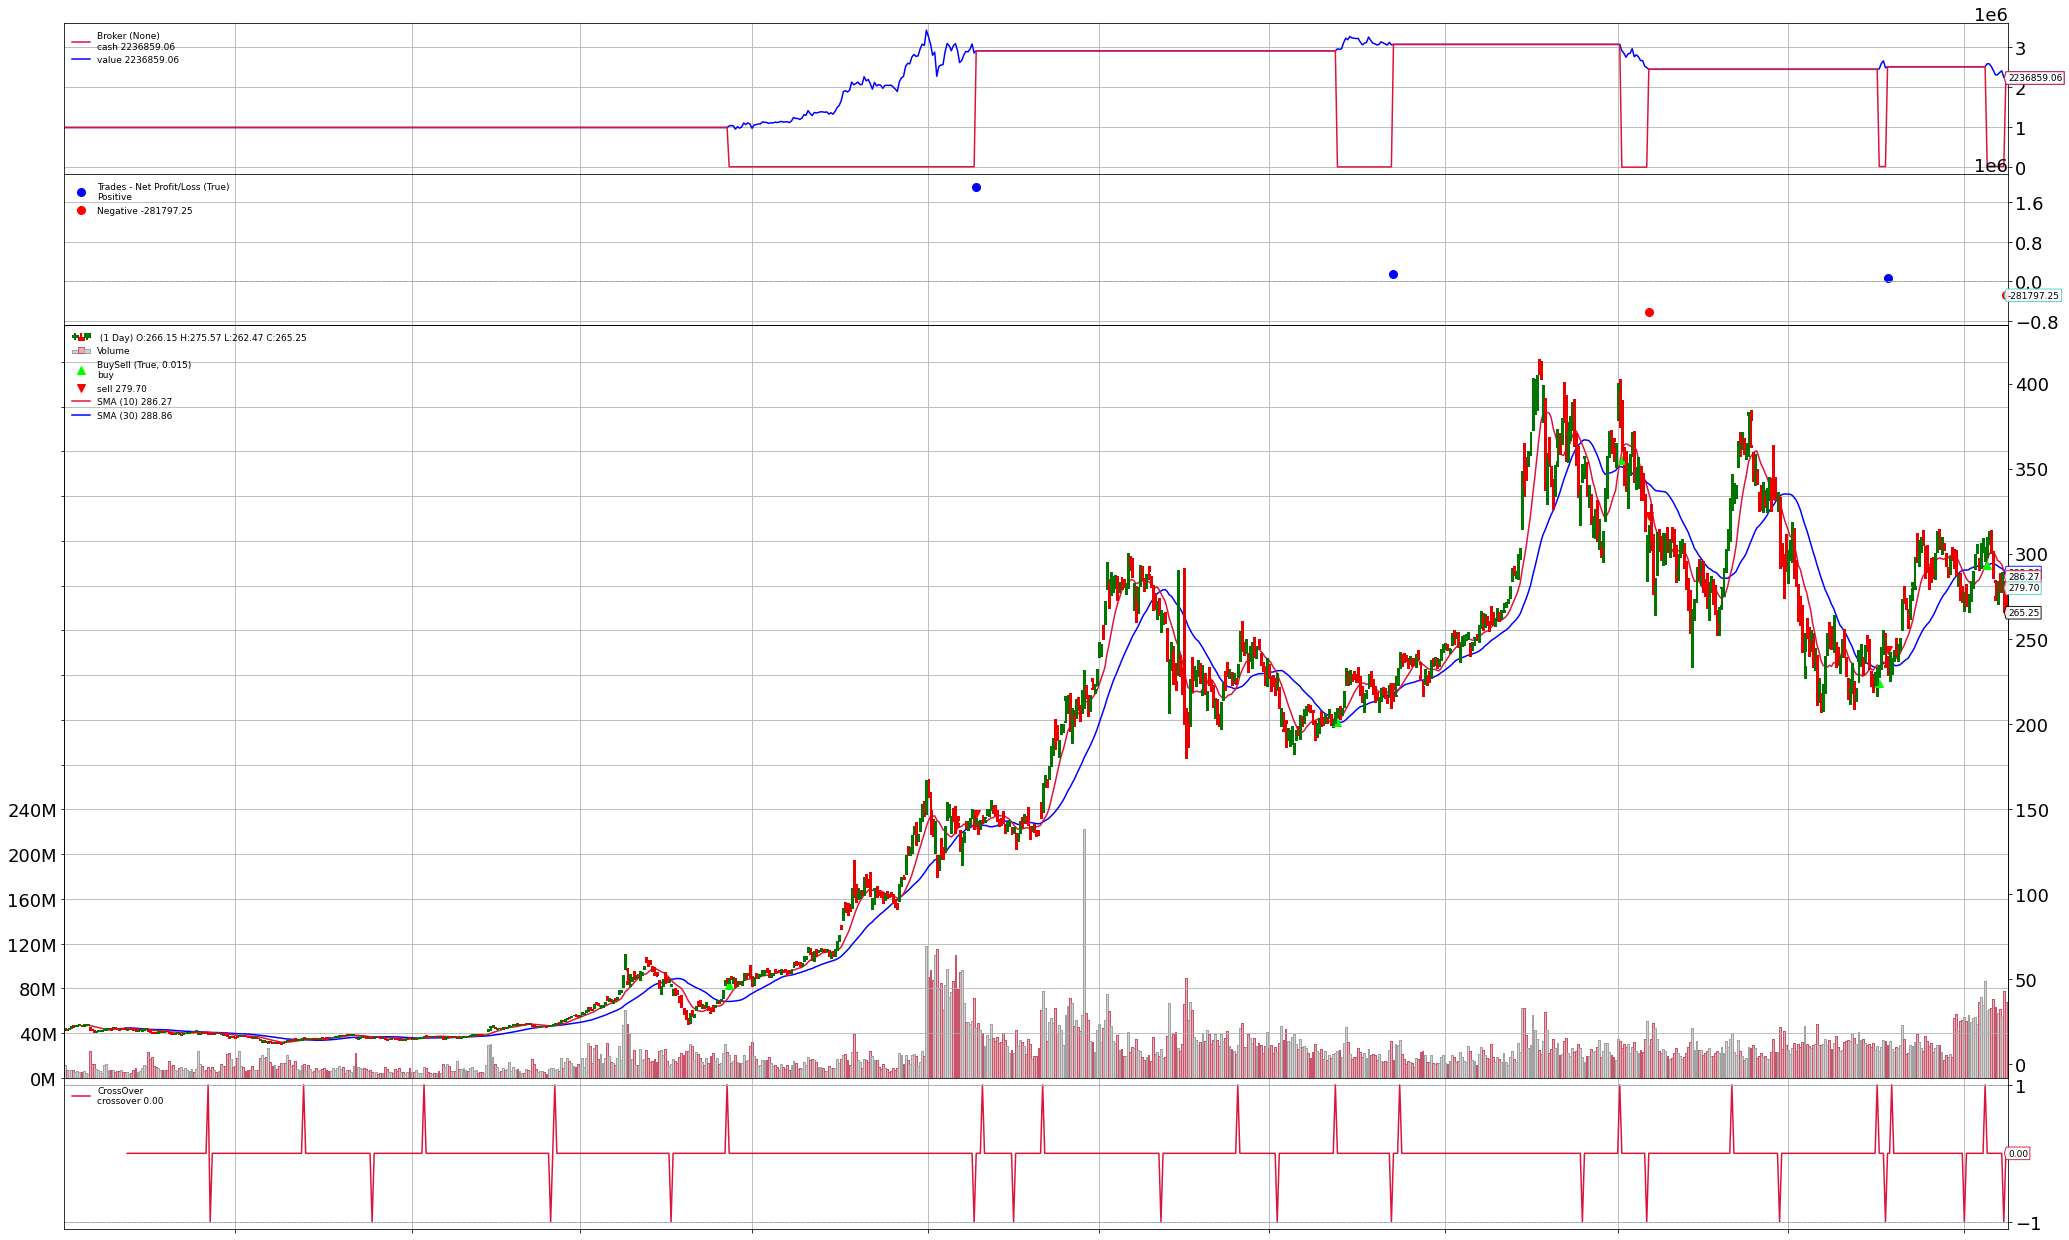

[[<Figure size 2160x1296 with 5 Axes>]]

In [27]:
url = baseurl + '/chart/TSLA/d?from=2019-01-01&to=2022-10-01';
chartResponse = requests.get(url)
chartDf = None
try:
  chartDf = pd.DataFrame(chartResponse.json()['payload'])
except Exception as e:
  print(e.__class__)
  print(e)
  print(chartResponse)
  print(chartResponse.text)
  raise e

chartDf.tickTime = pd.to_datetime(chartDf.tickTime)
chartDf = chartDf.set_index('tickTime')
chartDf.drop(['id', 'symbol','created'], axis=1, inplace=True)

cerebro.adddata(bt.feeds.PandasData(dataname=chartDf))

cerebro.run()
# cerebro.plot(style='bar')[0][0].savefig(chart_file, dpi=400)
# Image(open(chart_file, 'rb').read())
cerebro.plot(iplot = False, style='candlestick', barup='green', bardown='red')